In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from skimage import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Se vectorizan las imagenes en los datos de training para cada clase accediendo a cada carpeta correspondiente.

In [31]:
X_train=[]
y_train=[]
dim=(200,200)

Clase NEUMONIA


In [32]:
path_classes = '/content/drive/MyDrive/Proyecto IA/chest_xray/train/PNEUMONIA'
classes_names = os.listdir(path_classes)
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(0)  #0 Pneumonia

Clase NORMAL


In [33]:
path_classes = '/content/drive/MyDrive/Proyecto IA/chest_xray/train/NORMAL'
classes_names = os.listdir(path_classes)
for i in classes_names:
 
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_train.append(gray.flatten()) 
  y_train.append(1)  

#Para poder realizar las estimaciones se permutan los datos de train

Permutar 

In [38]:
perm = np.random.permutation(range(len(X_train)))
X_train=np.r_[X_train]
y_train=np.r_[y_train]
X_train=X_train[perm]
y_train=y_train[perm] 
print(X_train.shape)

(5216, 40000)


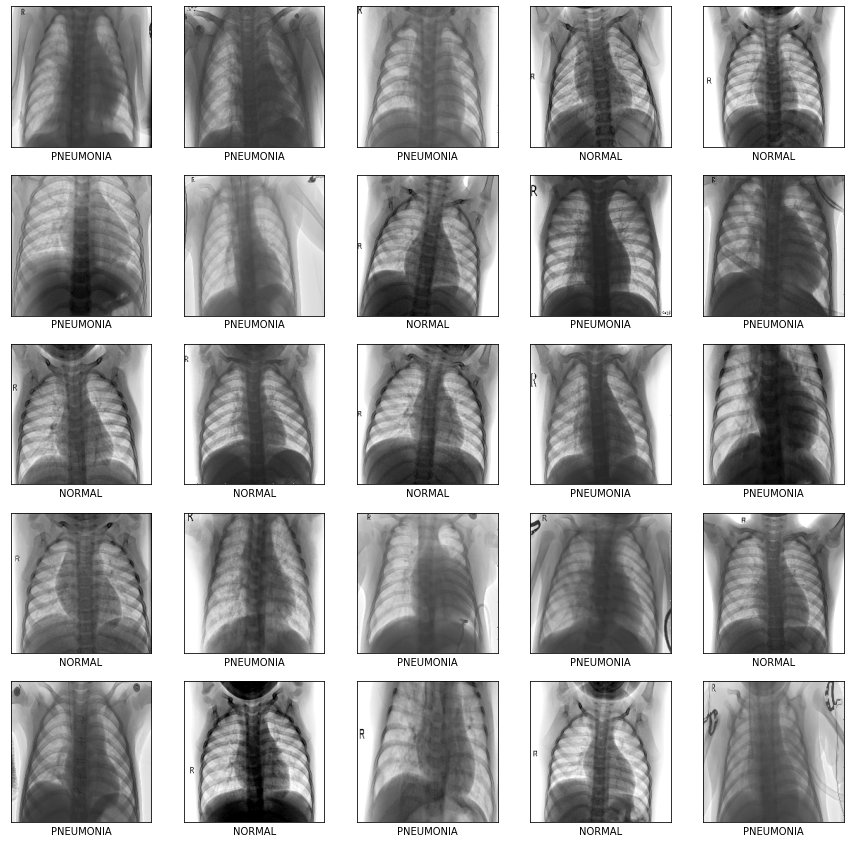

In [7]:
class_names = ['PNEUMONIA','NORMAL']
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(200,200),cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

# Se vectorizan las imagenes en los datos de test para cada clase accediendo a cada carpeta correspondiente.

In [39]:
loadtest = '/content/drive/MyDrive/Proyecto IA/chest_xray/test/PNEUMONIA'
test = os.listdir(loadtest)

X_test = [] #lista con imágenes de test
y_test = []


for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(0)  #0 PNEUMONIA

In [40]:
loadtest = '/content/drive/MyDrive/Proyecto IA/chest_xray/test/NORMAL'
test = os.listdir(loadtest)



for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(1)  #0 NORMAL

#Para poder realizar las estimaciones se permutan los datos de test

In [41]:
perm_t = np.random.permutation(range(len(X_test)))
X_test=np.r_[X_test]
y_test=np.r_[y_test]
X_test=X_test[perm_t]
y_test=y_test[perm_t]
print(X_test.shape)

(624, 40000)


In [11]:
print( "  clase   # de imágenes")
for i in np.unique(y_train):
    print( "   ",int(i), "       ", np.sum(y_train==i))

  clase   # de imágenes
    0         3875
    1         1341


In [47]:
print( "  clase   # de imágenes")
for i in np.unique(y_test):
    print( "   ",int(i), "       ", np.sum(y_test==i))

  clase   # de imágenes
    0         390
    1         234


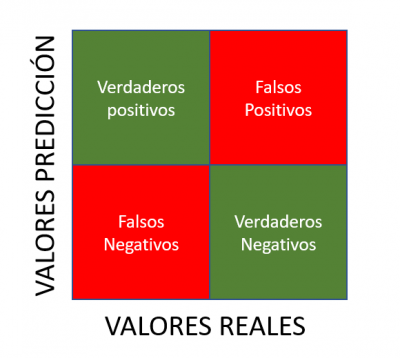

#APLICANDO METODOS

##GAUSSIAN

In [17]:
g = GaussianNB()
g.fit(X_train, y_train)
sG = cross_val_score(g, X_test, y_test, cv=KFold(30, shuffle=True), scoring=make_scorer(accuracy_score))
prediccionesG = g.predict(X_test)
print("accuracy %.3f (+/- %.5f)"%(np.mean(sG), np.std(sG)))
print( "acierto en train", g.score(X_train, y_train))
print( "acierto en test ", g.score(X_test, y_test))

accuracy 0.788 (+/- 0.08567)
acierto en train 0.85295245398773
acierto en test  0.7307692307692307


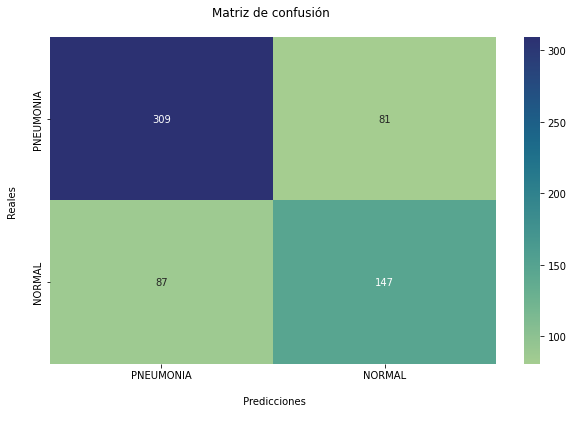

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, prediccionesG), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['PNEUMONIA','NORMAL'])
fx.yaxis.set_ticklabels(['PNEUMONIA','NORMAL'])
plt.show()

In [ ]:
print(classification_report(y_test, prediccionesG))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       390
           1       0.64      0.63      0.64       234

    accuracy                           0.73       624
   macro avg       0.71      0.71      0.71       624
weighted avg       0.73      0.73      0.73       624



#VECTOR MACHINE


In [19]:
svc = SVC()
svc.fit(X_train, y_train)
print(accuracy_score(svc.predict(X_test), y_test))

0.7596153846153846


In [ ]:
print( "acierto en train", svc.score(X_train, y_train))
print( "acierto en test ", svc.score(X_test, y_test))

acierto en train 0.9823619631901841
acierto en test  0.7596153846153846


In [ ]:
predicciones_train = svc.predict(X_train)
predicciones_test  = svc.predict(X_test)

In [20]:
score = cross_val_score(svc, X_test, y_test, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))

In [ ]:
cnf_matrix = confusion_matrix(y_test, predicciones_test)
print(cnf_matrix)

[[385   5]
 [145  89]]


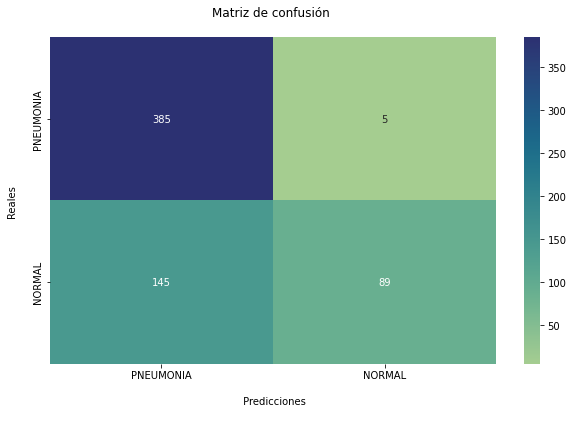

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones_test), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['PNEUMONIA','NORMAL'])
fx.yaxis.set_ticklabels(['PNEUMONIA','NORMAL'])
plt.show()

In [ ]:
print(classification_report(y_test, predicciones_test))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       390
           1       0.95      0.38      0.54       234

    accuracy                           0.76       624
   macro avg       0.84      0.68      0.69       624
weighted avg       0.81      0.76      0.73       624



#Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
estDT = DecisionTreeClassifier(max_depth=60)
estDT.fit(X_train, y_train)
estDT.predict(X_test)
sDT = cross_val_score(estDT, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(sDT), np.std(sDT)))

accuracy 0.812 (+/- 0.04432)


In [ ]:
print( "acierto en train", estDT.score(X_train, y_train))
print( "acierto en test ", estDT.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.7163461538461539


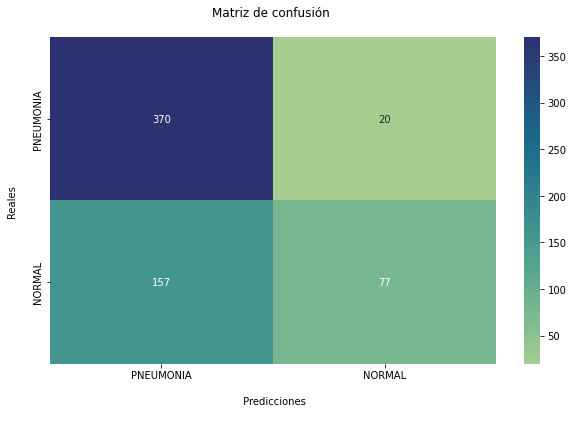

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, estDT.predict(X_test)), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['PNEUMONIA','NORMAL'])
fx.yaxis.set_ticklabels(['PNEUMONIA','NORMAL'])
plt.show()

In [ ]:
print(classification_report(y_test, estDT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81       390
           1       0.79      0.33      0.47       234

    accuracy                           0.72       624
   macro avg       0.75      0.64      0.64       624
weighted avg       0.74      0.72      0.68       624



#Random Forest

In [22]:
estRF = RandomForestClassifier()
estRF.fit(X_train, y_train)
predicciones = estRF.predict(X_test)
srf = cross_val_score(estRF, X_test, y_test, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(srf), np.std(srf)))

accuracy 0.881 (+/- 0.02656)


In [ ]:
print( "acierto en train", estRF.score(X_train, y_train))
print( "acierto en test ", estRF.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.7612179487179487


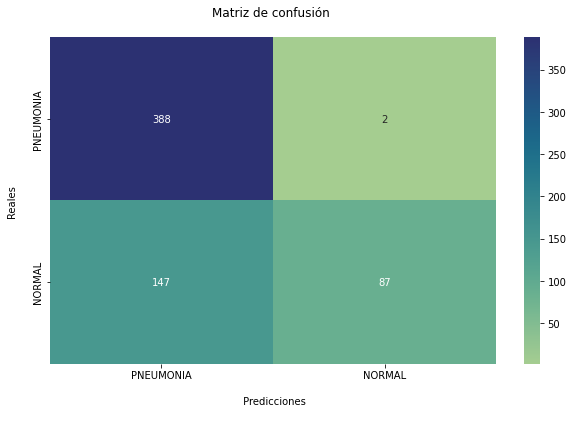

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt=".0f", cmap="crest")
fx.set_title('Matriz de confusión \n');
fx.set_xlabel('\n Predicciones\n')
fx.set_ylabel('Reales\n');
fx.xaxis.set_ticklabels(['PNEUMONIA','NORMAL'])
fx.yaxis.set_ticklabels(['PNEUMONIA','NORMAL'])
plt.show()

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       390
           1       0.98      0.37      0.54       234

    accuracy                           0.76       624
   macro avg       0.85      0.68      0.69       624
weighted avg       0.82      0.76      0.73       624




1. El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

2. El modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.


In [ ]:
X_train.shape

(5216, 40000)

In [ ]:
img.shape

(200, 200)

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
def create_model_O():
  model_O = keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape), #1 capa flatten aplane mi entrada
    tf.keras.layers.Dense(1000, activation=tf.nn.relu),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dense(250, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(class_names), activation=tf.nn.softmax) # capa de salida 
  ])
  model_O.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  model_O.summary()
  return model_O

In [14]:
modelo_O= None
modelo_O= create_model_O()
history_O = modelo_O.fit(X_train, y_train, epochs=40, batch_size=100, validation_data=(X_test, y_test))
test_loss_O, test_acc_O = modelo_O.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 40000)             0         
                                                                 
 dense_4 (Dense)             (None, 1000)              40001000  
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 250)               125250    
                                                                 
 dense_7 (Dense)             (None, 128)               32128     
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 40,659,136
Trainable params: 40,659,136


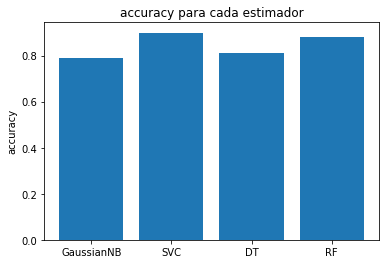

In [29]:
estimadores = ["GaussianNB", "SVC", "DT", "RF"] 
accuracy = [np.mean(sG),np.mean(score),np.mean(sDT), np.mean(srf)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy)
plt.show()

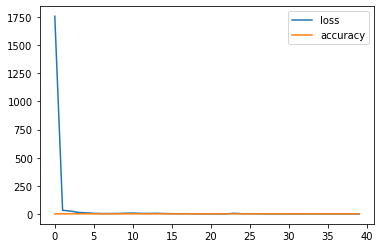

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(21)


plt.plot(history_O.history['loss'], label="loss")
plt.plot(history_O.history['accuracy'], label="accuracy")
plt.legend()
plt.show()